# Using SQL queries to answer business queries of music tracks company


### Introducing DataSet:
There is a database named "chinook.db" which contains 11 tables about employees,customers,invoice,tracks,albms etc

## Connecting Database using SQLite3

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [4]:
def show_tables():
    q = "SELECT name,type FROM sqlite_master WHERE type IN ('table','view') ;"
    print(run_query(q))
show_tables()

              name   type
0            album  table
1           artist  table
2         customer  table
3         employee  table
4            genre  table
5          invoice  table
6     invoice_line  table
7       media_type  table
8         playlist  table
9   playlist_track  table
10           track  table


### What are the three genres whose tracks are most sold?

18
18


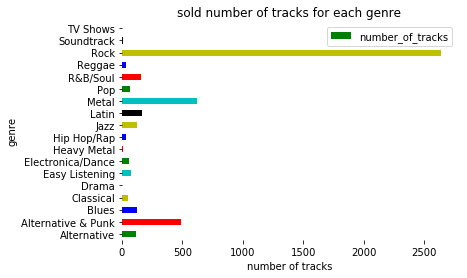

In [24]:
q1= '''
SELECT 
    g.name genre, 
    COUNT(il.invoice_line_id) number_of_tracks
FROM genre g 
INNER JOIN track t ON t.genre_id=g.genre_id 
INNER JOIN invoice_line il ON il.track_id=t.track_id 
GROUP BY 1
'''
a=run_query(q1)
#print(a["number_of_tracks"][:])
print(len(list(a["genre"][:])))
print(len(list(a["number_of_tracks"][:])))
ax=a.plot.barh(x='genre',y='number_of_tracks',color="grbykc")
ax.set_xlabel("number of tracks")
ax.set_ylabel("genre")
ax.set_title("sold number of tracks for each genre")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#### Three genre are:
Rock, Metal and Alternative & Punk

### what is the total dollar amount of sales assigned to each sales support agent within the company?

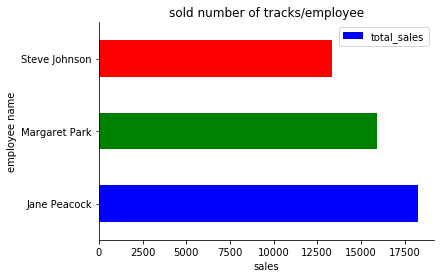

In [32]:
q2='''
SELECT 
    e.first_name || ' ' || e.last_name employee_name,
    SUM(i.total) total_sales 
FROM employee e 
INNER JOIN customer c ON e.employee_id=c.support_rep_id 
INNER JOIN invoice i ON i.customer_id=c.customer_id 
INNER JOIN invoice_line il ON il.invoice_id=i.invoice_id
GROUP BY 1
ORDER BY 1
'''
Q=run_query(q2)
h=Q.plot.barh(x='employee_name',y='total_sales',color="bgr")
h.set_ylabel("employee name")
h.set_xlabel("sales")
h.set_title("sold number of tracks/employee")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)

### Find the following parameters for each country:
~total number of customers
~total value of sales
~average value of sales per customer
~average order value

In [74]:
q3='''
SELECT
    
    c.country,
    COUNT(distinct c.customer_id) total_customers,
    SUM(i.total) total_sales,
    SUM(i.total)/COUNT(distinct c.customer_id) avg_sales_per_c,
    SUM(i.total)/COUNT(distinct i.invoice_id) avg_order_value
FROM invoice i
INNER JOIN customer c ON c.customer_id=i.customer_id
GROUP BY 1
ORDER BY 3 desc
'''
Result=run_query(q3)
sums=0
suma=0
sumo=0
count=0
for idx,row in Result.iterrows():
    if row["total_customers"]==1:
        count+=1
        sums+=row["total_sales"]
        suma+=row["avg_sales_per_c"]
        sumo+=row["avg_order_value"]
Result.loc[Result.shape[0]-1,'country']="other"
Result.loc[Result.shape[0]-1,"total_customers"]=0
Result.loc[Result.shape[0]-1,"total_sales"]=sums
Result.loc[Result.shape[0]-1,"avg_sales_per_c"]=suma/count
Result.loc[Result.shape[0]-1,"avg_order_value"]=sumo/count
Result=Result[Result["total_customers"] !=1 ]
Result.reset_index()

print(Result)


           country  total_customers  total_sales  avg_sales_per_c  \
0              USA               13      1040.49        80.037692   
1           Canada                8       535.59        66.948750   
2           Brazil                5       427.68        85.536000   
3           France                5       389.07        77.814000   
4          Germany                4       334.62        83.655000   
5   Czech Republic                2       273.24       136.620000   
6   United Kingdom                3       245.52        81.840000   
7         Portugal                2       185.13        92.565000   
8            India                2       183.15        91.575000   
23           other                0      1094.94        72.996000   

    avg_order_value  
0          7.942672  
1          7.047237  
2          7.011148  
3          7.781400  
4          8.161463  
5          9.108000  
6          8.768571  
7          6.383793  
8          8.721429  
23         7.445071 

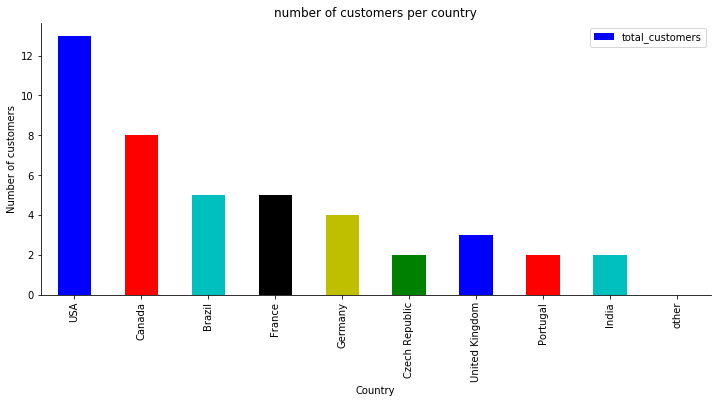

In [77]:
h=Result.plot.bar(x='country',y='total_customers',figsize=(12,5),color="brckyg")
h.set_ylabel("Number of customers")
h.set_xlabel("Country")
h.set_title("number of customers per country")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)

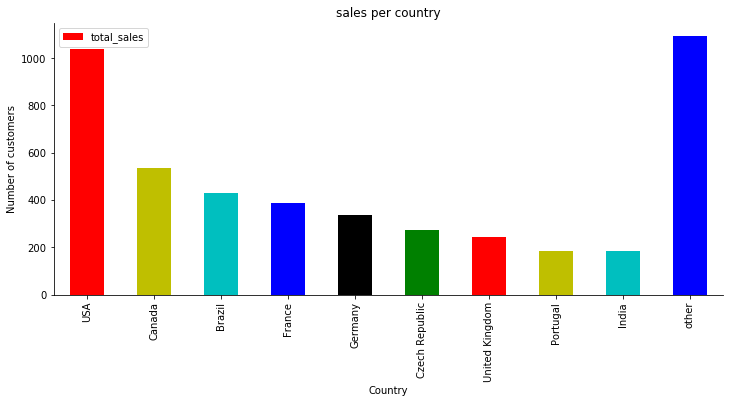

In [79]:
h=Result.plot.bar(x='country', y='total_sales',figsize=(12,5),color="rycbkg")
h.set_ylabel("Number of customers")
h.set_xlabel("Country")
h.set_title("sales per country")
h.spines['right'].set_visible(False)
h.spines['top'].set_visible(False)

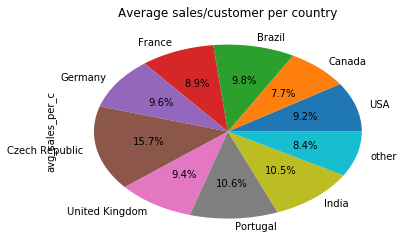

In [97]:
h=Result.plot(kind="pie",y='avg_sales_per_c',autopct='%1.1f%%',legend=False,labels=Result["country"])
h.set_title("Average sales/customer per country")

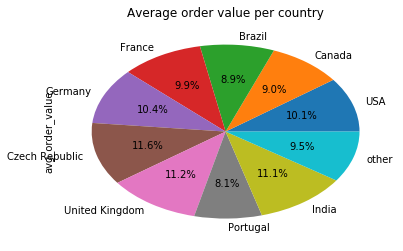

In [98]:
h=Result.plot(kind="pie",y='avg_order_value',autopct='%1.1f%%',legend=False,labels=Result["country"])
h.set_title("Average order value per country")